# Diabities-classification - Zaher

### Importing needed libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv(r"G:\Other computers\My old laptop\Desktop\;\Data Science\Data Science Projects\Diabities-Classification\diabetes.csv")

In [56]:
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
data.duplicated().sum()

0

## All the data are ready for analysis and model building 

In [73]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

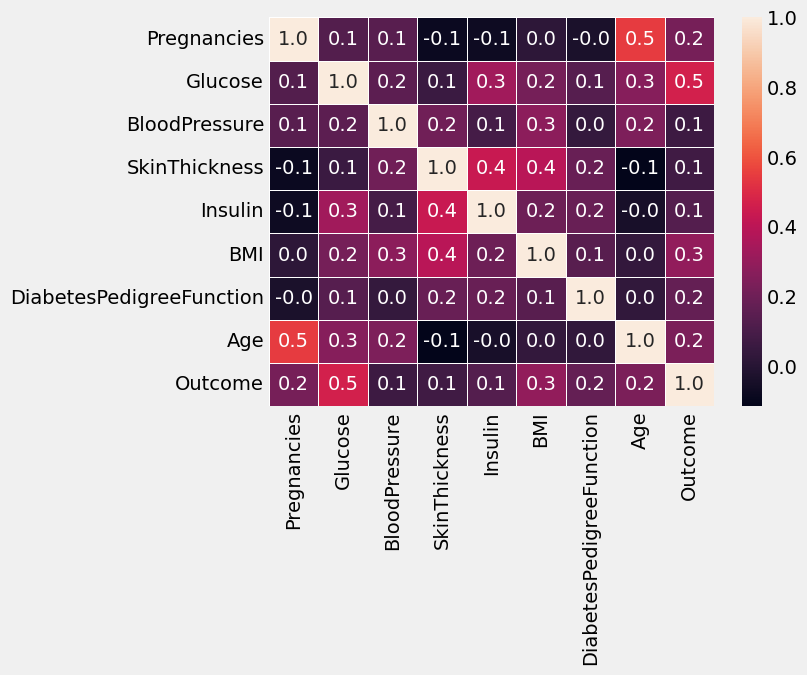

In [119]:
sns.heatmap(data.corr(), annot= True, fmt = '.1f', linewidth=.5)

<Axes: xlabel='Outcome', ylabel='count'>

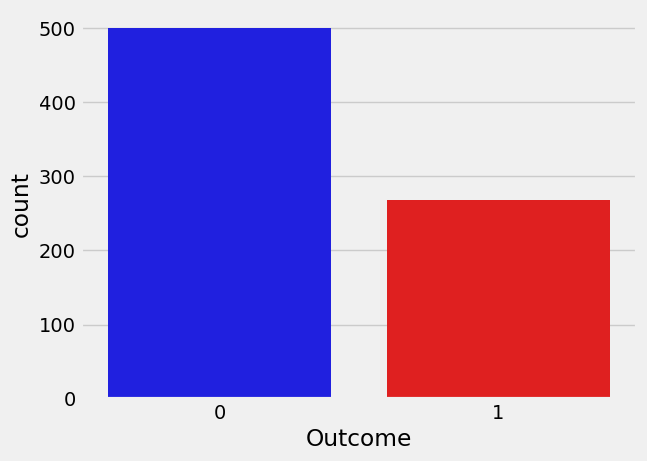

In [129]:
sns.countplot(x = 'Outcome', data= data, palette = ['b','r'])

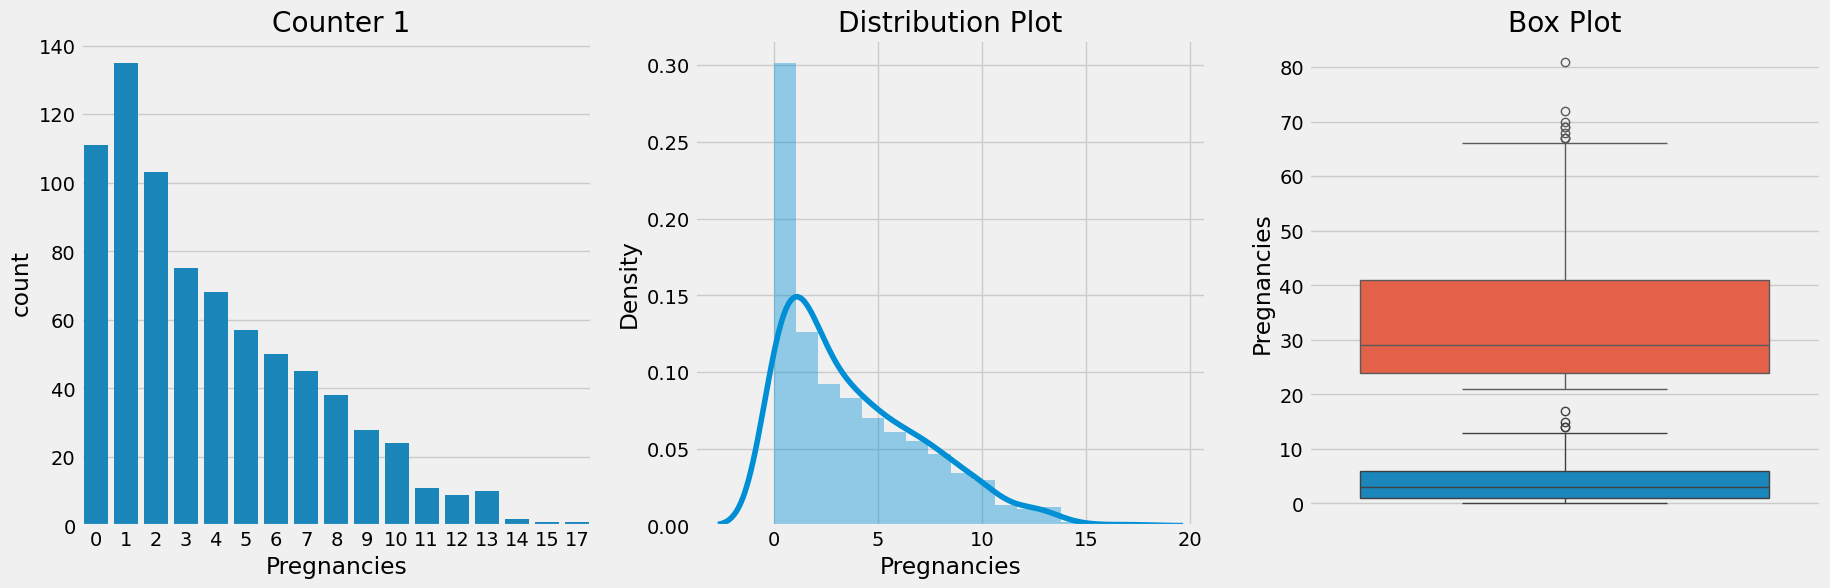

In [185]:
plt.figure(figsize = (20,6))


plt.subplot(1,3,1)
plt.title(' Counter 1')
sns.countplot(x ='Pregnancies' , data=data )

plt.subplot(1,3,2)
plt.title ('Distribution Plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title ('Box Plot')
sns.boxplot(y = data['Pregnancies'])




plt.show()

<Axes: title={'center': 'Box Plot Age'}, ylabel='Age'>

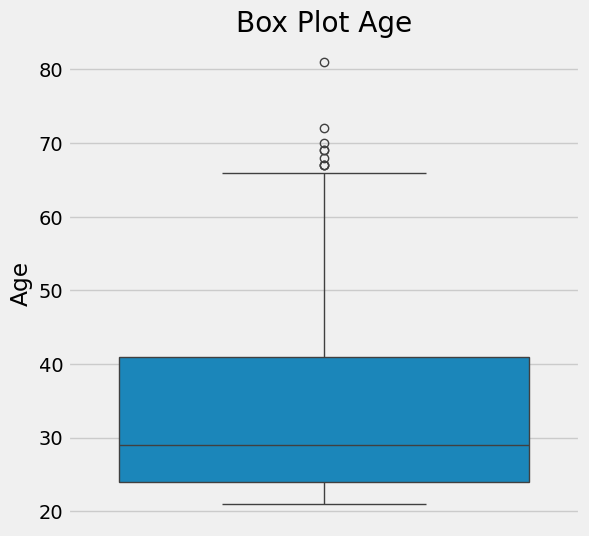

In [203]:
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
plt.title ('Box Plot Age')
sns.boxplot(data.Age)

# Building the model

In [232]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [238]:
x = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [380]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 40)

TypeError: Singleton array array(SVC(), dtype=object) cannot be considered a valid collection.

In [251]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [255]:
predict = model.predict(x_test)

In [296]:
accuracy_score (predict, y_test)

0.7792207792207793

In [ ]:
# confusion_matrix,  accuracy_score, recall_score, f1_score,  classification_report

In [314]:
z = recall_score(predict, y_test)
print (z)

0.7307692307692307


In [269]:
f1_score (predict, y_test)

0.6909090909090909

In [271]:
confusion_matrix (predict, y_test)

array([[82, 20],
       [14, 38]], dtype=int64)

<Axes: >

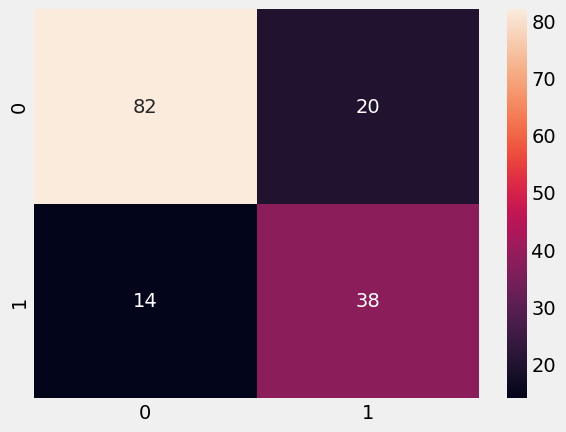

In [280]:
sns.heatmap(confusion_matrix (predict, y_test), annot= True)

In [556]:
columns = []
result9 = []
result8 = []
result7 = []

In [563]:
def model(a):
    
    a.fit(x_train,y_train)
    predict = a.predict(x_test)
    accuracy= accuracy_score (predict, y_test)
    recal = recall_score(predict, y_test)
    f1= f1_score (predict, y_test)

    result9.append(accuracy)
    result8.append(recal)
    result7.append(f1)
    columns.append(a)
    
    sns.heatmap(confusion_matrix (predict, y_test), annot= True)
    
    print (a)
    print ('accuracy_score: ', accuracy, 'recall_score: ', recal, 'f1_score: ', f1)

In [565]:
m1= RandomForestClassifier()
m2= GradientBoostingClassifier()
m3 = LogisticRegression()
m4= SVC()

RandomForestClassifier()
accuracy_score:  0.7922077922077922 recall_score:  0.75 f1_score:  0.7090909090909091


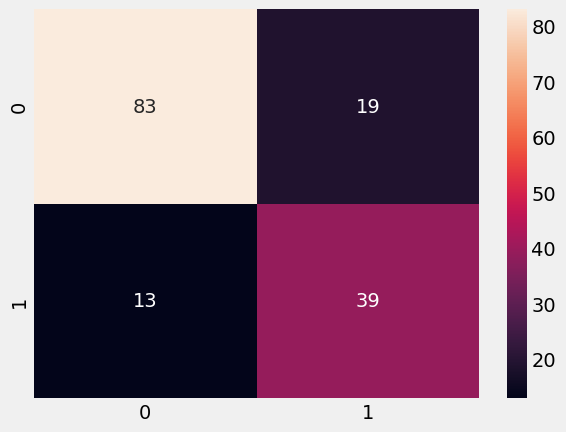

In [567]:

model (m1)

GradientBoostingClassifier()
accuracy_score:  0.7922077922077922 recall_score:  0.7321428571428571 f1_score:  0.7192982456140351


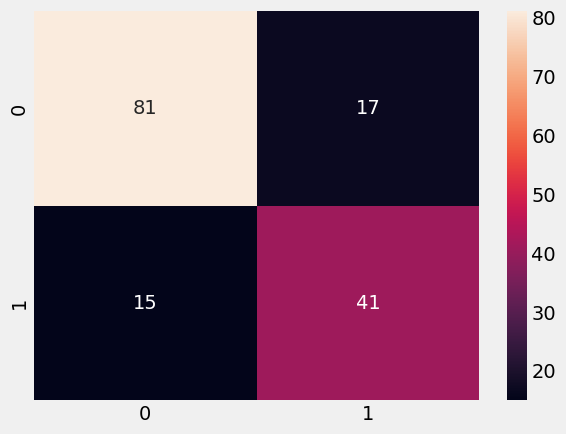

In [568]:
model (m2)

LogisticRegression()
accuracy_score:  0.7857142857142857 recall_score:  0.7777777777777778 f1_score:  0.6796116504854369


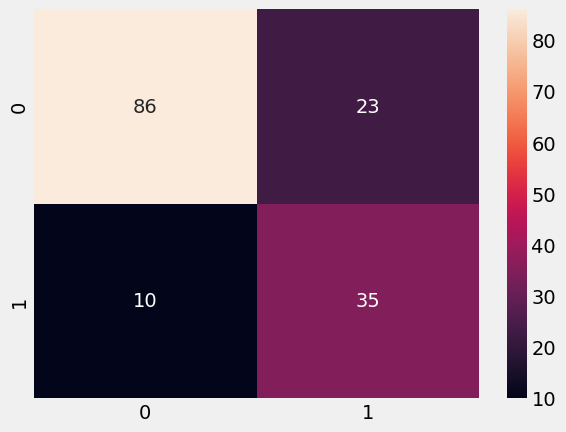

In [584]:
model (m3)

SVC()
accuracy_score:  0.7727272727272727 recall_score:  0.8108108108108109 f1_score:  0.631578947368421


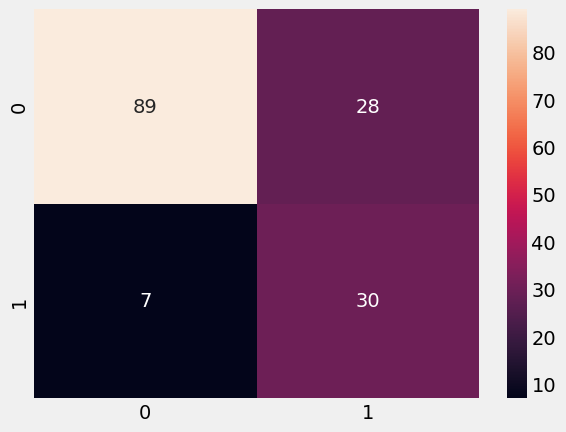

In [586]:
model (m4)

In [588]:
result9

[0.7922077922077922,
 0.7922077922077922,
 0.7857142857142857,
 0.7727272727272727,
 0.7857142857142857,
 0.7727272727272727]

In [596]:
Final_result = pd.DataFrame({'Algorithm': columns, 'Accuracies': result9, 'Recall': result8, 'Fscore': result7 })

In [610]:
#a table that include all the results from running the prediction models


Final_result

,Algorithm,Accuracies,Recall,Fscore
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.792208,0.750000,0.709091
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.792208,0.732143,0.719298
2,LogisticRegression(),0.785714,0.777778,0.679612
3,SVC(),0.772727,0.810811,0.631579
4,LogisticRegression(),0.785714,0.777778,0.679612
5,SVC(),0.772727,0.810811,0.631579


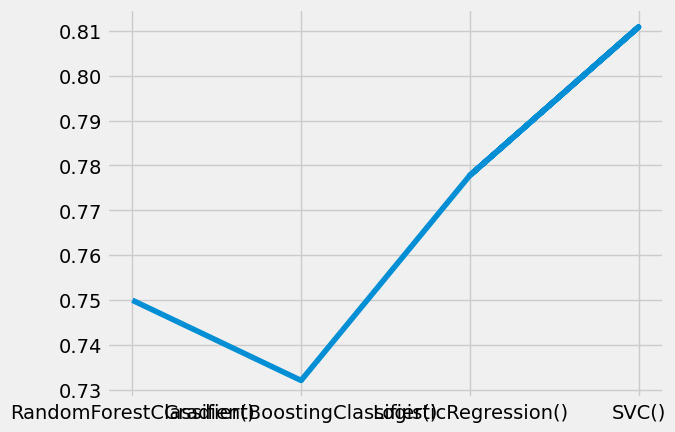

In [618]:
Final_result['Algorithm'] = Final_result['Algorithm'].astype(str)
plt.plot(Final_result['Algorithm'], result8)